<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales convolucionales (CNN)

Ejemplo de clasificación utilizando redes neuronales convolucionales para la clasificación de imagenes<br>

v2.0

### **Objetivos:**
* Estudiar el dataset de Vegetales.
* Implementar Transfer Learning y Redes Convolucionales para la clasificación de imágenes de los Vegetales.

In [1]:
# Librerías a implementar
import json
import zipfile
import os
import pandas as pd
from PIL import Image
import random

import matplotlib.image as mpimg
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
import gdown
import zipfile
import os

# Especifica el ID del archivo en Google Drive
file_id_reducido = '1XEhAdQBXTgia2kKmHO3DeCDfkSLkSHS6'
url = f'https://drive.google.com/uc?id={file_id_reducido}'

output = 'vegetales.zip'

# Verificar si el directorio ya existe
if os.access('./vegetales', os.F_OK) is False:
    # Descargar el archivo desde Google Drive
    gdown.download(url, output, quiet=False)

    # Especifica el directorio de destino para la extracción
    extract_path_reducido = './'

    # Especifica el directorio de destino para la extracción
    #extract_path_reducido = './simpsons_dataset_reducido'

    # Extraer el contenido del archivo zip
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall(extract_path_reducido)

    print("La carpeta se ha descargado y descomprimido correctamente.")
else:
    print("La carpeta ya se encuentra descargada")


Downloading...
From (original): https://drive.google.com/uc?id=1XEhAdQBXTgia2kKmHO3DeCDfkSLkSHS6
From (redirected): https://drive.google.com/uc?id=1XEhAdQBXTgia2kKmHO3DeCDfkSLkSHS6&confirm=t&uuid=b1c9398a-7bed-4617-b15c-522cb6556d0f
To: /content/vegetales.zip
100%|██████████| 561M/561M [00:05<00:00, 96.5MB/s]


La carpeta se ha descargado y descomprimido correctamente.
['test', 'train', 'validation']


In [2]:
# if os.access('./vegetales', os.F_OK) is False:
#     !curl -L -o 'vegetales.zip' 'https://drive.google.com/uc?id=1XEhAdQBXTgia2kKmHO3DeCDfkSLkSHS6&export=download&confirm=t'
#     !unzip -q vegetales.zip
# else:
#     print("La carpeta ya se encuentra descargada")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2425  100  2425    0     0   5628      0 --:--:-- --:--:-- --:--:--  5628
[vegetales.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of vegetales.zip or
        vegetales.zip.zip, and cannot find vegetales.zip.ZIP, period.


In [5]:
# Visualizar los directiorios.
os.listdir("./vegetales")

['test', 'train', 'validation']

In [6]:
# /content/vegetales/test
# /content/vegetales/train
# /content/vegetales/validation

In [7]:
# Visualizar los tipos de vegetales
train_dir = "./vegetales/train"
validation_dir = "./vegetales/validation"
os.listdir(train_dir)

['Cabbage',
 'Cauliflower',
 'Cucumber',
 'Radish',
 'Bean',
 'Carrot',
 'Tomato',
 'Bitter_Gourd',
 'Broccoli',
 'Bottle_Gourd',
 'Papaya',
 'Brinjal',
 'Potato',
 'Capsicum',
 'Pumpkin']

In [8]:
vegetales = os.listdir(train_dir)
print("Cantidad de tipos de vegetales:", len(vegetales))

Cantidad de tipos de vegetales: 15


In [9]:
vegetales

['Cabbage',
 'Cauliflower',
 'Cucumber',
 'Radish',
 'Bean',
 'Carrot',
 'Tomato',
 'Bitter_Gourd',
 'Broccoli',
 'Bottle_Gourd',
 'Papaya',
 'Brinjal',
 'Potato',
 'Capsicum',
 'Pumpkin']

In [10]:
# Imagenes de la primer carpeta, que esta en la primer ubicación
files = glob(train_dir + "/" + vegetales[0] + "/**.jpg")
files[:10]

['./vegetales/train/Cabbage/0667.jpg',
 './vegetales/train/Cabbage/0042.jpg',
 './vegetales/train/Cabbage/0609.jpg',
 './vegetales/train/Cabbage/0590.jpg',
 './vegetales/train/Cabbage/0718.jpg',
 './vegetales/train/Cabbage/1348.jpg',
 './vegetales/train/Cabbage/0285.jpg',
 './vegetales/train/Cabbage/0279.jpg',
 './vegetales/train/Cabbage/0551.jpg',
 './vegetales/train/Cabbage/0806.jpg']

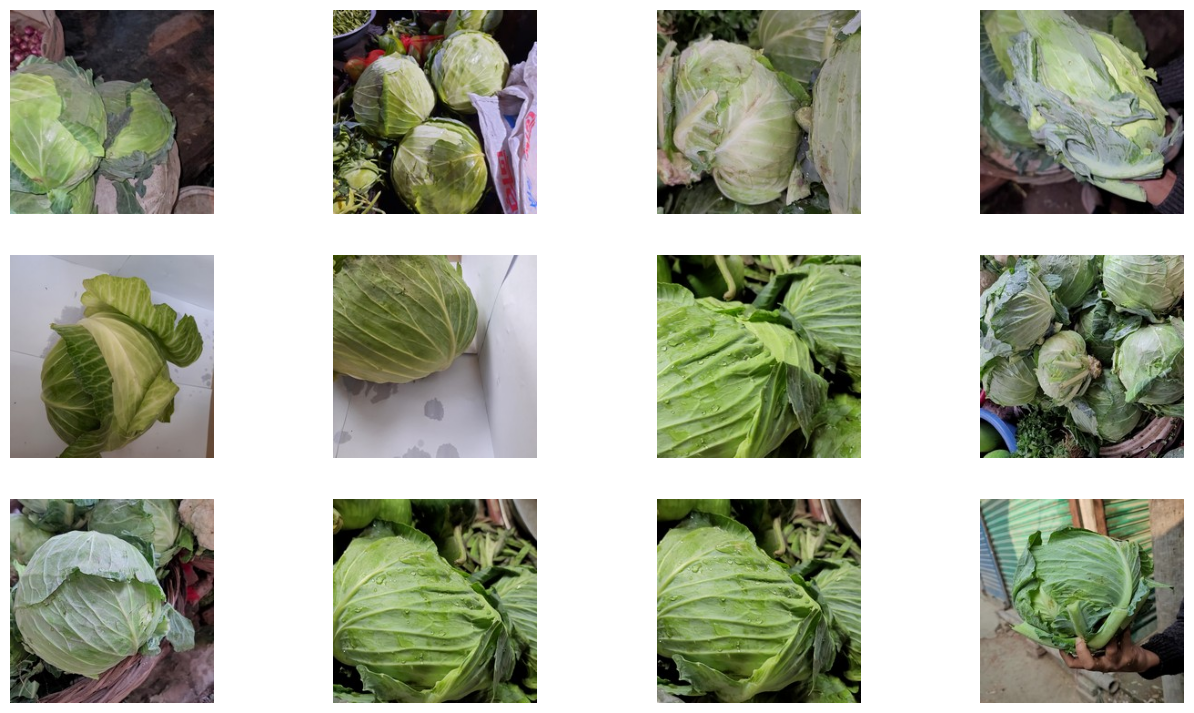

In [11]:
# Visualizar las 10 primeras imagenes de un vegetal
# glob(), encuentra todos los nombres de rutas que se asemejan
# a un patrón especificado de acuerdo a las reglas que sigue la ruta.
files = glob(train_dir + "/" + vegetales[0] + "/**.jpg")

# plt alias de Matplotlib.
# Método figure() crea el espacio para dibujar.
# Con figsize=(16,9) se define el ancho y alto del dibujo
fig = plt.figure(figsize=(16,9))

# Bucle que itera 10 veces para mostrar las primeras 10 imágenes del dataset
for i in range(12):

    # ax gráfico que mostrará las imágenes en 2 filas y 5 columnas
    # En cada iteración va ubicando la imagen en la siguiente posición (i+1)
    ax = fig.add_subplot(3, 4, i+1)
    # .axis('off') elimina el recuadro de cada imagen
    ax.axis('off')
    # Herramienta de Matplotlib para para leer imágenes
    img = mpimg.imread(files[i])
    # Muestra las imágenes de la variable data_X_train en el espacio del dibujo
    plt.imshow(img)

# Muestra la figura
plt.show()

In [12]:
# Visualizar la dimension de la primera imagen
img = mpimg.imread(files[0])
img.shape

(224, 224, 3)

In [13]:
# Visualizar como están representados los pixeles internos.
print(img[85, 100:110, :])

[[117 122 118]
 [119 124 120]
 [120 122 119]
 [118 120 117]
 [114 116 113]
 [117 119 116]
 [119 121 118]
 [118 120 115]
 [118 120 115]
 [119 121 116]]


#### Conclusiones
- Las imagenes tienen todos el mismo tamaño, 224x224, que es importante ya que el clasificador vgg19 recibe imágenes del tamaño indicado.
- Las imagenes están representadas de 0 a 255, hay que normalizarlas

## Observar que tan balanceado está el dataset

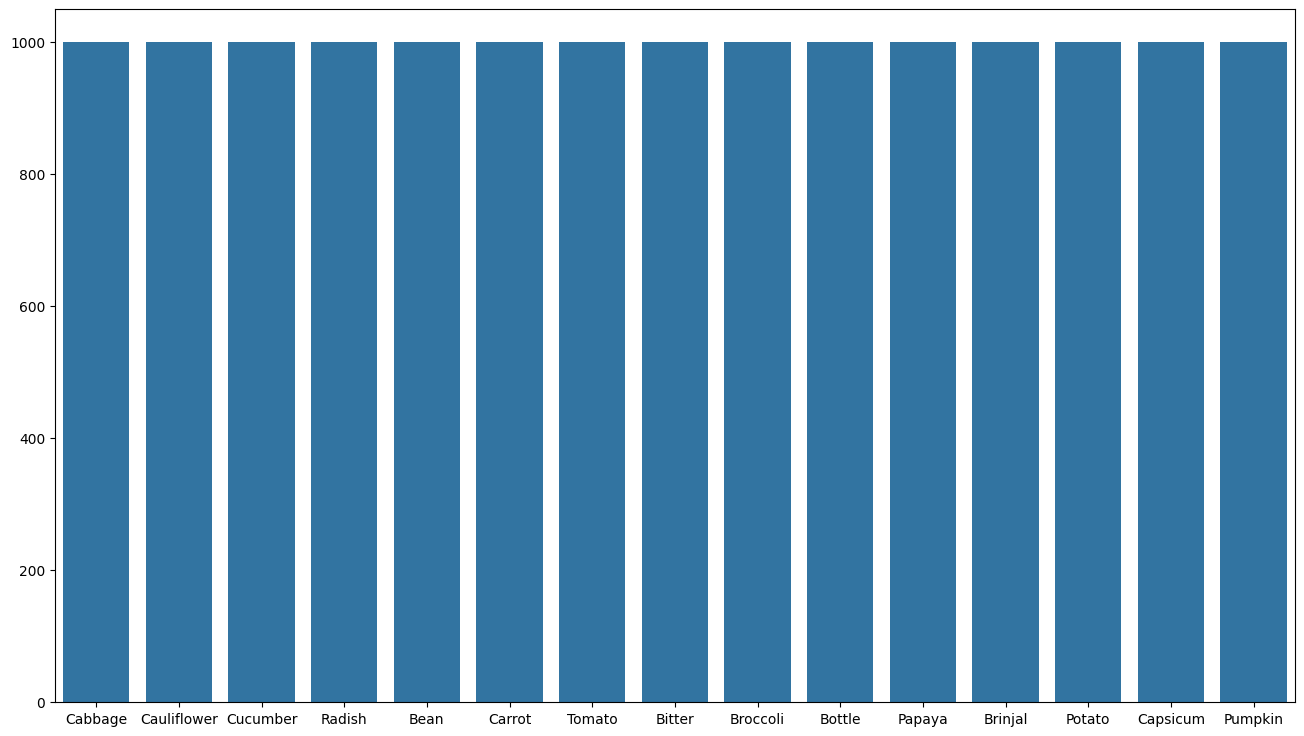

In [14]:
# Analizar cuantos vegetales hay de cada uno
nombres_vegetales = []
cantidad_vegetal = []

# Bucle que itera la lista de vegetales
for vegetal in vegetales:

    # Almacena la ruta completa de cada imagen
    files = glob(train_dir + "/" + vegetal + "/**.jpg")

    # Por cada nombre de imagen separa por _
    nombre_vegetal= vegetal.split("_")[0]

    # Almacena el nombre de cada vegetal en una lista
    nombres_vegetales.append(nombre_vegetal)

    # Almacena la cantidad de rutas que es igual a la cantidad de vegetales
    cantidad_vegetal.append(len(files))

# Graficar la cantidad de imágenes que tiene cada vegetal
# plt alias de Matplotlib.
# Método figure() crea el espacio para dibujar.
# Con figsize=(16,9) se define el ancho y alto del dibujo
fig = plt.figure(figsize=(16,9))

# espacio ax para el gráfico a mostrar
ax = fig.add_subplot()

# Gráfico de barra (barplot)
# sns, alias de Seaborn
# ax=ax, los datos se representarán en horiizontal
sns.barplot(x=nombres_vegetales, y=cantidad_vegetal, ax=ax)

# Mostrar la imagen.
plt.show()

El dataset está perfectamente balanceado.

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [15]:
# Se importa ImageDataGenerator del módulo de keras.preprocessing.image
from keras.preprocessing.image import ImageDataGenerator

# Crear un generador, indicando si deseamos realizar un escalado de la imagen
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# El método .flow_from_directory, toma la ruta a un directorio y genera lotes de datos aumentados.
# target_size, se indica la dimensión de la imagen que se desea.
# batch_size, la cantidad que va a tomar para aplicar la operación de escalado.
# class_mode, es categorical ya que son varios vegetales.
train_generator = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=(224, 224),
        batch_size=140,
        class_mode="categorical")

# Mismo proceso para los datos de validación
validation_generator = validation_datagen.flow_from_directory(
        directory=validation_dir,
        target_size=(224, 224),
        batch_size=80,
        class_mode="categorical")

# Con dict, arma un diccionario
# con zip, es una función toma que iterables como argumentos y devuelve un iterador.
# Es decir, se construye en diccionario indice:valor --> ubicacion:nombre_vegetal
index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))
index_to_classes

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


{0: 'Bean',
 1: 'Bitter_Gourd',
 2: 'Bottle_Gourd',
 3: 'Brinjal',
 4: 'Broccoli',
 5: 'Cabbage',
 6: 'Capsicum',
 7: 'Carrot',
 8: 'Cauliflower',
 9: 'Cucumber',
 10: 'Papaya',
 11: 'Potato',
 12: 'Pumpkin',
 13: 'Radish',
 14: 'Tomato'}

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [16]:
# El generador "train_generator" se lo puede utilizar para acceder a los datos
# de a cantidad batch de imagenes. En este caso el generador me retornará
# la primera vez las primeras 140 imagenes
# El generador devuelve las imagenes (X) y las clases(vegetales) a las que
# pertenece (y)
# X, y = train_generator.next()
batch_imagenes, batch_clases = train_generator.next()

In [17]:
# Cantidad de imágenes, dimensión alto, dimensión ancho, canales de color
batch_imagenes.shape

(140, 224, 224, 3)

In [18]:
# Cantidad de imagenes y categorías
batch_clases.shape

(140, 15)

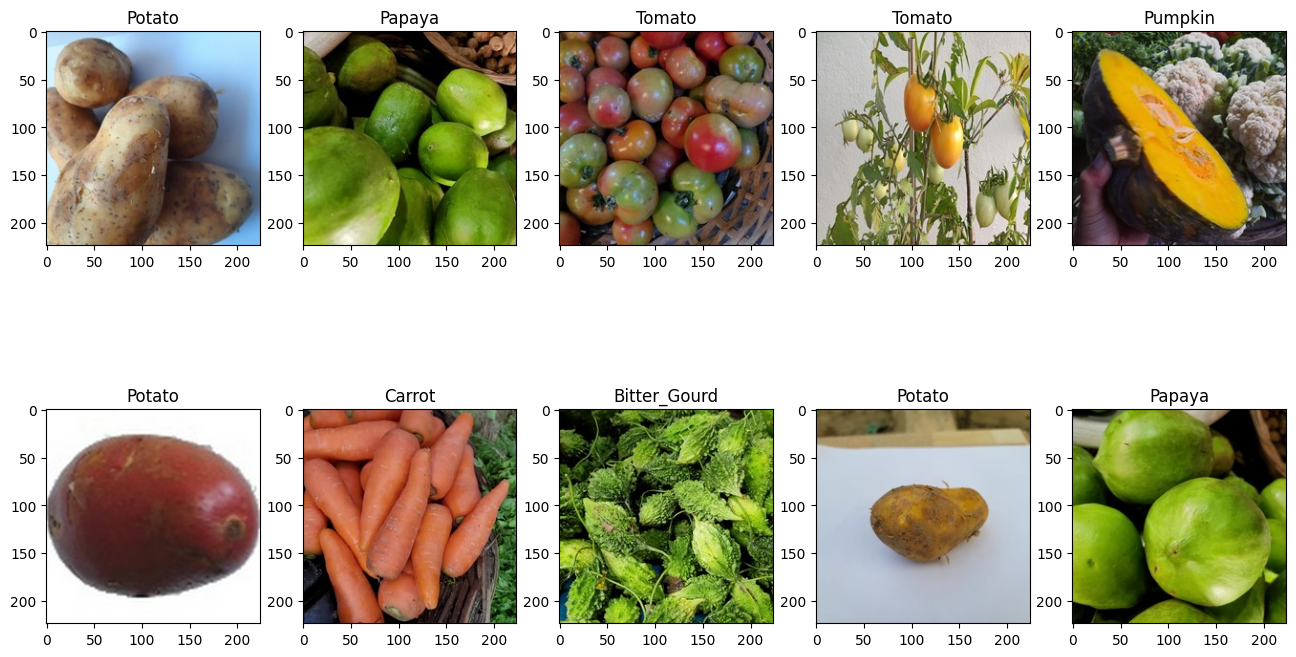

In [19]:
# Observar las primeras 5 imagenes de ese batch
# plt alias de Matplotlib.
# Método figure() crea el espacio para dibujar.
# Con figsize=(16,9) se define el ancho y alto del dibujofig = plt.figure(figsize=(16,9))
# Observar las primeras 5 imagenes de ese batch
fig = plt.figure(figsize=(16,9))

# Itera 5 veces
for i in range(10):

    # ax, gráfico que mostrará las imágenes en 1 filas y 5 columnas
    # En cada iteración va ubicando la imagen en la siguiente posición (i+1)
    ax = fig.add_subplot(2, 5, i+1)

    # Muestra la imagen
    ax.imshow(batch_imagenes[i])

    # Ubica por la posición de la imagen el nombre que le corresponde.
    numero_clase = batch_clases[i].argmax()

    # A cada imagen le agrega un titulo que sería el nombre del vegetal que le corresponde.
    ax.set_title(index_to_classes[numero_clase])
plt.show()

__Importante__! Luego de usar un generador "jugando", ese batch de imagenes que sacamos ya no se encontrará disponible para ser utilizado en el entrenamiento, es recomendable volver a crear los generadores si se los consumen

In [20]:
# Crear un generador, indicando si deseamos realizar un escalado de la imagen
train_datagen = ImageDataGenerator(rescale=1./255)


# El método .flow_from_directory, toma la ruta a un directorio y genera lotes de datos aumentados.
# target_size, se indica la dimensión de la imagen que se desea.
# batch_size, la cantidad que va a tomar para aplicar la operación de escalado.
# class_mode, es categorical ya que son varios vegetales.
train_generator = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=(224,224),
        batch_size=140,
        class_mode="categorical")

# Con dict, arma un diccionario
# con zip, es una función toma que iterables como argumentos y devuelve un iterador.
# Es decir, se construye en diccionario indice:valor --> ubicacion:nombre_vegetal
index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))

Found 15000 images belonging to 15 classes.


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

__NOTA:__ Los generadores ya se encargan de transformar la salida a oneHotEncoding

In [21]:
# input shape (observado del análisis de datos)
# Almacena las dimensiones y los canales de color, sería la entrada a la red
in_shape = (224, 224, 3)
print('Entrada', in_shape)

# output shape (observado del análisis de datos)
# 15 ya que representa categorías, los nombres de los vegetales con lo que se entrena la red
out_shape = 15
print('Salida:', out_shape)

Entrada (224, 224, 3)
Salida: 15


In [22]:
# Debemos definir cuantas imagenes se consumiran por epoca para entrenamiento
# y validación (steps_per_epoch).
# ya que estando el generador en el medio Keras no puede saberlo por
# su cuenta
epoch_train = len(train_generator)
print(epoch_train)

epoch_validation = len(validation_generator)
print(epoch_validation )

108
38



VGG-19 es una red neuronal convolucional con 19 capas de profundidad. Puede cargar una versión preentrenada de la red entrenada en más de un millón de imágenes desde la base de datos [1] de ImageNet. La red preentrenada puede clasificar imágenes en 1000 categorías de objetos (por ejemplo, teclado, ratón, lápiz y animales). Como resultado, la red ha aprendido representaciones ricas en características para una amplia gama de imágenes. El tamaño de la entrada de la red debe ser el mismo que seleccionamos para las imágenes (en este caso 224x224)

In [23]:
# Fuente = https://keras.io/api/applications/#usage-examples-for-image-classification-models
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

modelo_vgg = VGG19(weights='imagenet',
                   input_shape=in_shape,
                   include_top=False,     # No incluir las 3 capas completamente conectadas en la parte superior de la red.
                   pooling=None, # Significa que la salida del modelo será la salida del tensor 4D del último bloque convolucional.
                   )

modelo_vgg.trainable=False

# Estructura de la red
modelo_vgg.summary()


80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [24]:
# Se importa Dense,  Dropout, Flatten de la librería keras.layers
# Se importa Conv2D, MaxPooling2D  de la librería keras.layers.convolutional
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential

# Se crea el objeto model1 a partir de la clase Sequential()
model = Sequential()

# Incluir al modelo la red vgg_base traida de VGG16
model.add(modelo_vgg)

# Ahora agregaremos más pares de capas CONV + POOL a fin de reducir más la
# dimensión de la imagen antes de llegar a la capa flatten
# Otra estrategia es ir aumentando la cantidad de filtros a medida que crece
# la profundidad de la red

# Capa de comunicación entre la red convolucional y la red neuronal
model.add(Flatten())

# Red Neuronal que inicia con 128 neuronas y la función de activación "relu"
model.add(Dense(units=32, activation='relu'))
# Se agrega una capa de dropout para dormir parte de las neuronas.
model.add(Dropout(rate=0.2))

# Red Neuronal que inicia con 64 neuronas y la función de activación "relu"
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(rate=0.2))

# Capa de salida con la cantidad de vegetales y 'softmax' porque es multicategorical
model.add(Dense(units=out_shape, activation='softmax'))

# Configuración del modelo para el entrenamiento, implementando el método compile a partir del modelo creado.
# Se necesita indicar los parámetros:
# optimizer, nombre del optimizador (es el algoritmo que se encarga del descenso de gradiente estocástico)
# Fuente: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
# loss, se llama función de pérdida, representa las categorías conocidas de las predicción. Al ser 'categorical_crossentropy'
#la predicción tiene una salida con varias opciones.
# metrics, se define la métrica que evaluará el modelo durante el entrenamiento y las pruebas.
model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 32)                802848    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                2

In [25]:
# Se entrena el modelo con el método fit
# Necesita definir los valores para train_generator, la cantidad de épocas que seria la iteraciones de entrenamiento y
# steps_per_epoch, cantidad de imágenes a consumir la red por época.
# validation_steps, cantidad de imágenes para validación
# validation_data, imagénes preprocesadas.
history = model.fit(
      train_generator,
      steps_per_epoch=epoch_train,
      validation_data=validation_generator,
      validation_steps=epoch_validation,
      epochs=2
      )

Epoch 1/2
108/108 [==============================] - 140s 1s/step - loss: 2.3606 - accuracy: 0.1909 - val_loss: 1.8002 - val_accuracy: 0.4790
Epoch 2/2
108/108 [==============================] - 93s 857ms/step - loss: 1.8274 - accuracy: 0.3475 - val_loss: 1.3525 - val_accuracy: 0.6157


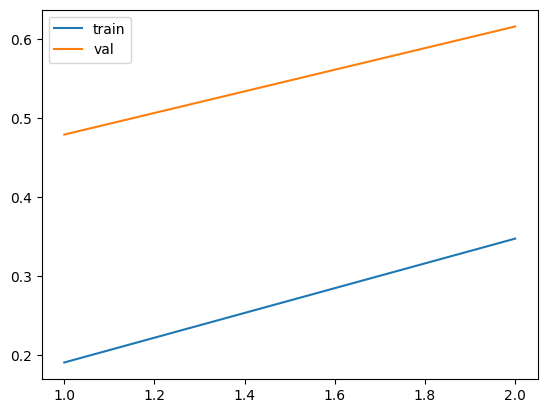

In [26]:
# Variable epoch_count, que almacena en una lista la cantidad de épocas de train
# history, es la variable que almacena las predicciones del modelo
# y de ella, se puede acceder a información como su historial (history) del accuracy y val_accuracy
epoch_count = range(1, len(history.history['accuracy']) + 1)

# De Seaborn (sns) se accede al gráfico de línea para representar el 'accuracy' y val_accuracy
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='val')
plt.show()

__NOTA:__ Habría que entrenar por más épocas el modelo, pero por una cuestión de tiempo solo se realizan 2.

In [27]:
# Crear el generador de test
test_dir = "./vegetales/test"

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        directory=test_dir,
        target_size=(224, 224),
        batch_size=3000,  # leemos todas las imagenes juntas de la carpeta test
        class_mode="categorical")

Found 3000 images belonging to 15 classes.


In [28]:
# Predecir los datos
# Hay que primero leer las imagenes y sus lables del generador
batch_imagenes, batch_clases = test_generator.next()

# Predecir la salida del modelo
y_hat_prob = model.predict(batch_imagenes)

# Obtener el "y" verdadero --> Almacenar los resultados reales esperados
y_test = np.argmax(batch_clases, axis=1)
y_test

94/94 [==============================] - 27s 213ms/step


array([13, 10,  6, ..., 14,  0,  8])

In [29]:
# Se transforman las probabilidades en el id del vegetal (de 0 a 14)
y_hat = np.argmax(y_hat_prob,axis=1)
y_hat

array([13, 10,  6, ...,  0,  0, 13])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [30]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.622

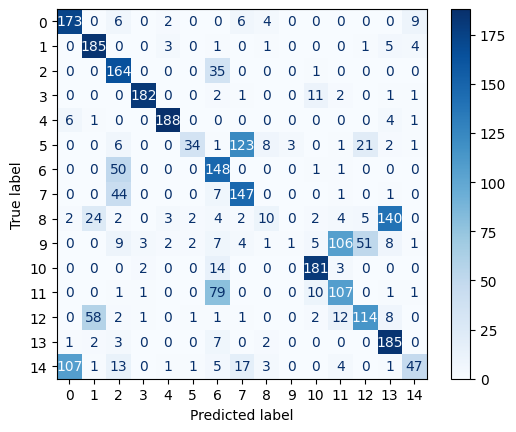

In [31]:
# Se utiliza la matriz de confusión para evaluar la precisión de una clasificación.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Necesita dos variables que contengan los valores a comparar
cm = confusion_matrix(y_test, y_hat)

# Código para realizar la representación gráfica con los resultados
# Se crea la varible cmd, que almacena visualization de la Confusion Matrix
# Necesita la variable cm que contiene los resultados de la comparación entre los valores reales y predicción
# display_labels, se especifica las etiquetas de las categorias que se evalúan.
cmd = ConfusionMatrixDisplay(cm)

# Con cmd.plot se especifica el mapa de colores reconocido por matplotlib.
cmd.plot(cmap=plt.cm.Blues)

# Mostrar la figura
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

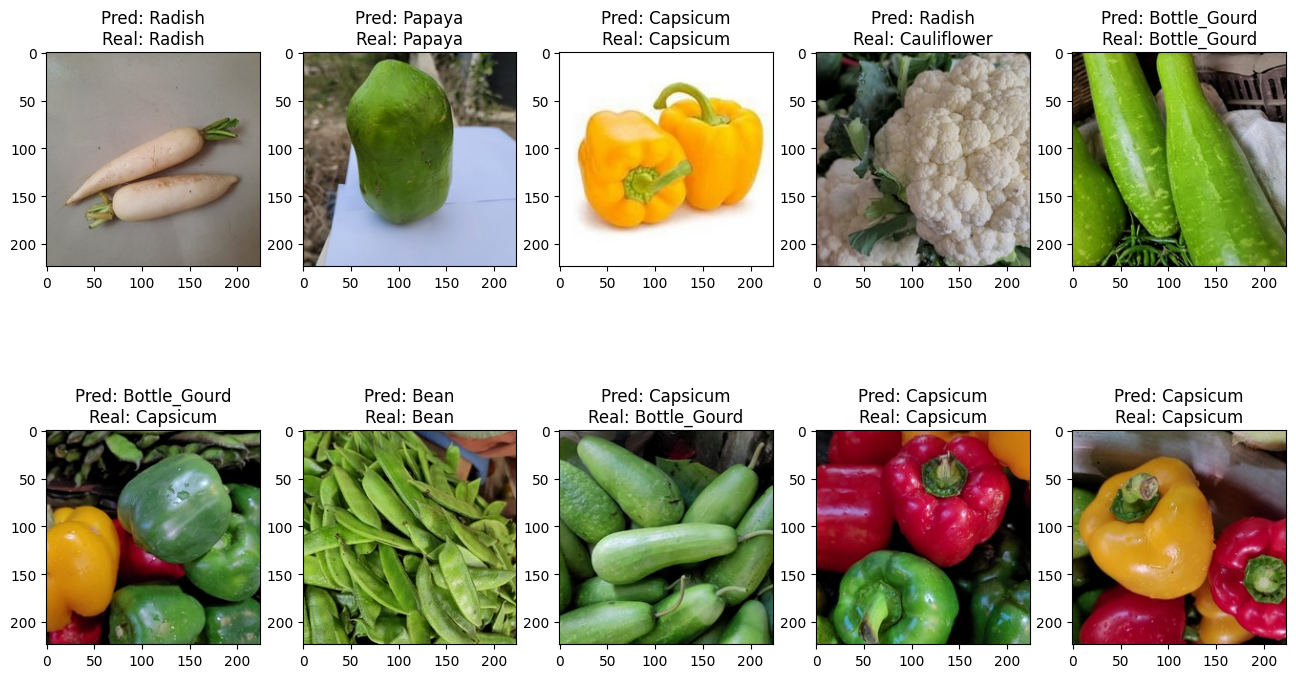

In [32]:
# plt alias de Matplotlib.
# Método figure() crea el espacio para dibujar.
# Con figsize=(16,9) se define el ancho y alto del dibujofig = plt.figure(figsize=(16,9))
# Observar las primeras 10 imagenes del batch de test
fig = plt.figure(figsize=(16,9))

# Itera 10 veces
for i in range(10):

    # ax, gráfico que mostrará las imágenes en 2 filas y 5 columnas
    # En cada iteración va ubicando la imagen en la siguiente posición (i+1)
    ax = fig.add_subplot(2, 5, i+1)

    # Muestra la imagen
    ax.imshow(batch_imagenes[i])

    # Ubica por la posición de la imagen el nombre que le corresponde.
    pred_numero_clase = y_hat[i]  # número de clase (vegetal) que se predijo
    real_numero_clase = y_test[i]  # número de clase (vegetal) esperado o real

    # A cada imagen le agrega un titulo que sería el nombre del personaje que le corresponde.
    ax.set_title(
        f"Pred: {index_to_classes[pred_numero_clase]}\nReal: {index_to_classes[real_numero_clase]}"
        )

# Muestra la imagen.
plt.show()

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

¡Se puede observar que con solo dos iteraciones el modelo aprendió bastante! Esto se debe a utilizar técnicas de transfer learning que acelera el entrenamiento de los modelos.